In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from pathlib import Path

data_path = Path('/Users/jes/Library/CloudStorage/OneDrive-RobertGordonUniversity(2)/ProjectMINE/Birmingham/')
start =pd.Timestamp('2018-03-01') 
end = pd.Timestamp('2024-12-31')
air_pre =pd.read_csv(data_path/'Air_Pre_Final.csv', parse_dates=['Datetime'])
air_post= pd.read_csv(data_path/'Air_Post_Final.csv', parse_dates=['Datetime'])
air=pd.concat([air_pre, air_post], ignore_index=True)

traffic_pre=pd.read_csv(data_path/'Traffic_Pre.csv', parse_dates=['datetime'])
traffic_post=pd.read_csv(data_path/'Traffic_Post.csv', parse_dates=['datetime'])
traffic=pd.concat([traffic_pre, traffic_post], ignore_index=True)

In [82]:
air = air[(air['Datetime'] >= start) & (air['Datetime'] <= end)].copy()
traffic = traffic[(traffic['datetime'] >= start) & (traffic['datetime'] <= end)].copy()
# yearly fields
air['year'] = air['Datetime'].dt.year
air['date'] = air['Datetime'].dt.date
traffic['year'] = traffic['datetime'].dt.year
traffic['date'] = traffic['datetime'].dt.date

# daily fields
# air['day'] = air['Datetime'].dt.day['hour'] = air['Datetime'].dt.hour
#air['day'] = air['Datetime'].dt.day
#air['month'] = air['Datetime'].dt.month
#air['dayofweek'] = air['Datetime'].dt.dayofweek

#traffic['hour'] = traffic['datetime'].dt.hour
#traffic['day'] = traffic['datetime'].dt.day
#traffic['month'] = traffic['datetime'].dt.month
#traffic['dayofweek'] = traffic['datetime'].dt.dayofweek


air_yearly = (
    air.groupby("year")
    .agg(hourly_records=("Datetime", "size"), 
         distinct_days  = ("date", "nunique"),
         n_sites=("site_name", "nunique"))
        .reset_index()
        .query("year >= 2018 and year <= 2024")
)
air_site_yearly=(
    air.groupby(["site_name", "year"])
    .agg(hourly_records=("Datetime", "size"), 
         distinct_days  = ("date", "nunique"))
        .reset_index()
        .query("year >= 2018 and year <= 2024")
)
traffic_yearly = (
    traffic.groupby("year")
    .agg(hourly_records=("datetime", "size"), 
         distinct_days  = ("date", "nunique"),
         end_junction=("end_junction_road_name", "nunique"),
         start_junction=("start_junction_road_name", "nunique"))
        .reset_index()
        .query("year >= 2018 and year <= 2024")
)
out_dir = data_path/'outputs'/'Table'
out_dir.mkdir(parents=True, exist_ok=True)
air_yearly.to_csv(out_dir/'completeness_air_yearly.csv', index=False)
traffic_yearly.to_csv(out_dir/'completeness_traffic_yearly.csv', index=False)
air_site_yearly.to_csv(out_dir/'completeness_air_site_yearly.csv', index=False)
#st.write("Air Quality Yearly Completeness")
#st.write(air_yearly)
#st.write("Traffic Yearly Completeness")
#st.write(traffic_yearly)
#st.write("Air Quality Site Yearly Completeness")
#st.write(air_site_yearly)


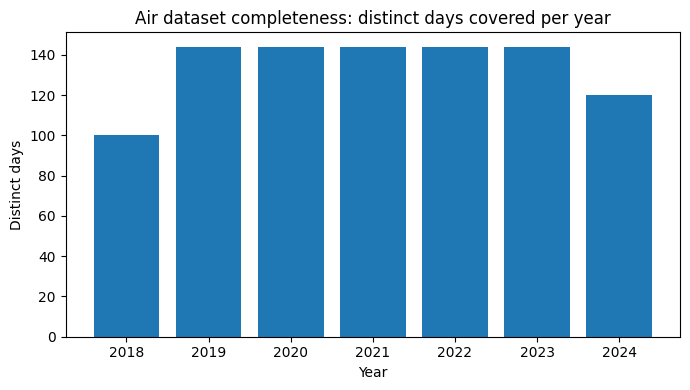

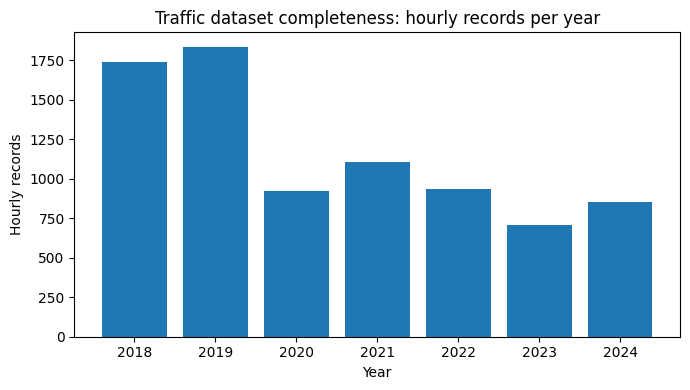

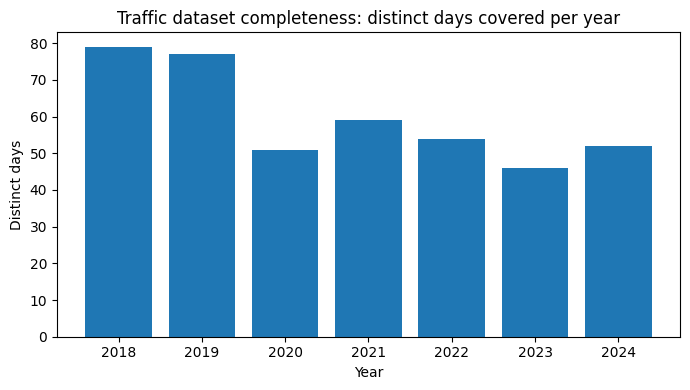

In [83]:
plt.figure(figsize=(7,4))
plt.bar(air_yearly["year"].astype(str), air_yearly["distinct_days"])
plt.title("Air dataset completeness: distinct days covered per year")
plt.xlabel("Year")
plt.ylabel("Distinct days")
plt.tight_layout()
plt.show()
#   TRAFFIC hourly records per year 
plt.figure(figsize=(7,4))
plt.bar(traffic_yearly["year"].astype(str), traffic_yearly["hourly_records"])
plt.title("Traffic dataset completeness: hourly records per year")
plt.xlabel("Year")
plt.ylabel("Hourly records")
plt.tight_layout()
plt.show()

#   TRAFFIC distinct days per year 
plt.figure(figsize=(7,4))
plt.bar(traffic_yearly["year"].astype(str), traffic_yearly["distinct_days"])
plt.title("Traffic dataset completeness: distinct days covered per year")
plt.xlabel("Year")
plt.ylabel("Distinct days")
plt.tight_layout()
plt.show()

In [76]:
print(air["Datetime"].min())
print(air["Datetime"].max())



2018-03-03 01:00:00
2024-12-10 23:00:00


<Figure size 640x480 with 0 Axes>

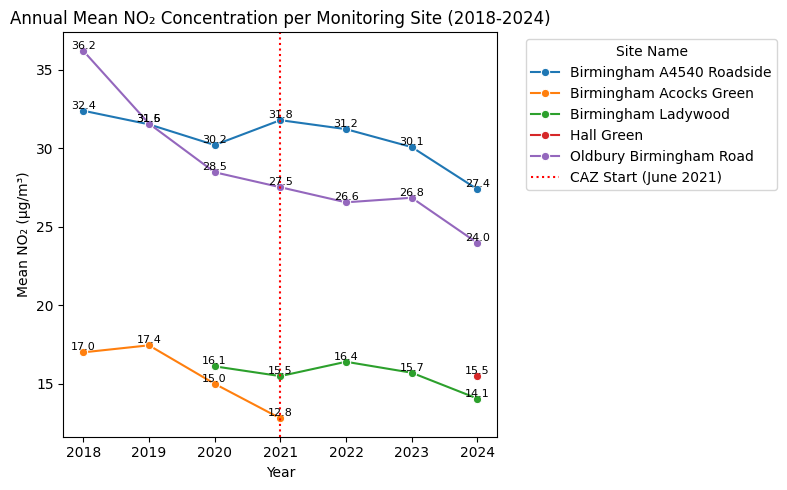

2025-11-13 04:45:34.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 04:45:34.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 04:45:34.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 04:45:34.230 
Calling `st.pyplot()` without providing a figure argument has been deprecated
and will be removed in a later version as it requires the use of Matplotlib's
global figure object, which is not thread-safe.

To future-proof this code, you should pass in a figure as shown below:

```python
fig, ax = plt.subplots()
ax.scatter([1, 2, 3], [1, 2, 3])
# other plotting actions...
st.pyplot(fig)
```

If you have a specific use case that requires this functionality, please let us
know via [issue on Github](https://github.com/streamlit/streamlit/issues).

2025-11-13 04:45:34.231 Thread 'MainThread': mis

<Figure size 640x480 with 0 Axes>

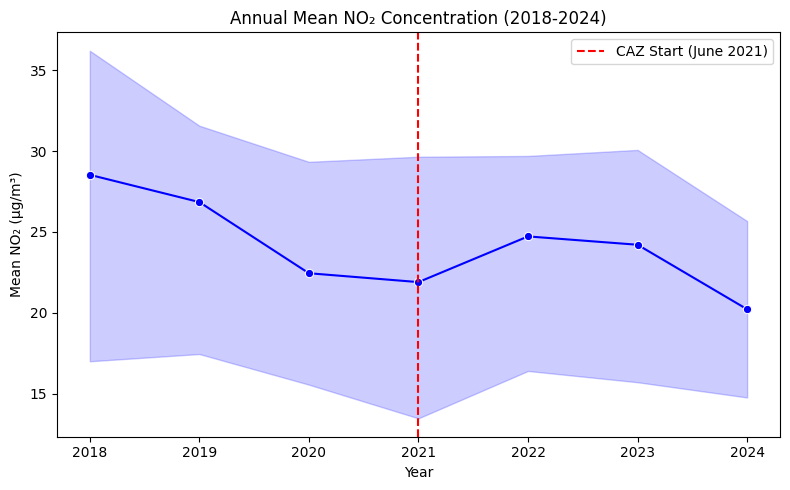

2025-11-13 04:45:34.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 04:45:34.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 04:45:34.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 04:45:34.396 
Calling `st.pyplot()` without providing a figure argument has been deprecated
and will be removed in a later version as it requires the use of Matplotlib's
global figure object, which is not thread-safe.

To future-proof this code, you should pass in a figure as shown below:

```python
fig, ax = plt.subplots()
ax.scatter([1, 2, 3], [1, 2, 3])
# other plotting actions...
st.pyplot(fig)
```

If you have a specific use case that requires this functionality, please let us
know via [issue on Github](https://github.com/streamlit/streamlit/issues).

2025-11-13 04:45:34.396 Thread 'MainThread': mis

DeltaGenerator()

In [85]:
air['year'] = air['Datetime'].dt.year.astype(int)
traffic['year'] = traffic['datetime'].dt.year
# Group by monitoring site and year
annual_no2 = (
    air.groupby(["site_name", "year"])["NO2"]
       .mean()
       .reset_index()
       .sort_values(["site_name", "year"])
      
)
annual_no2["year"] = annual_no2["year"].astype(int)

annual_no2.to_csv(data_path / "outputs/annual_no2.csv", index=False)
plt.figure(figsize=(8,5))
sns.lineplot(data=annual_no2, x= "year" , y="NO2", hue="site_name", marker="o")
plt.title("Annual Mean NO₂ Concentration per Monitoring Site (2018-2024)")
plt.xlabel("Year")
plt.ylabel("Mean NO₂ (µg/m³)")
plt.axvline(x=2021, color="red", linestyle=":", label="CAZ Start (June 2021)")
plt.legend(title="Site Name", bbox_to_anchor=(1.05, 1), loc="upper left")
for site in annual_no2["site_name"].unique():
     subset = annual_no2[annual_no2["site_name"] == site]
     for x,y in zip(subset["year"], subset["NO2"]):
         plt.text(x, y, f"{y:.1f}", fontsize=8, ha='center', va='bottom')
plt.tight_layout()
plt.xticks(sorted(annual_no2["year"].unique()))
plt.show()
st.pyplot()
plt.figure(figsize=(8,5))
sns.lineplot(data=annual_no2, x="year", y="NO2", marker="o", color="blue")
plt.title("Annual Mean NO₂ Concentration (2018-2024)")
plt.xlabel("Year")
plt.ylabel("Mean NO₂ (µg/m³)")
plt.axvline(x=2021, color="red", linestyle="--", label="CAZ Start (June 2021)")
plt.legend()
#for site in annual_no2["site_name"].unique():
    # subset = annual_no2[annual_no2["site_name"] == site]
    # for x,y in zip(subset["year"], subset["NO2"]):
      #   plt.text(x, y, f"{y:.1f}", fontsize=8, ha='center', va='bottom')
plt.tight_layout()
plt.xticks(sorted(annual_no2["year"].unique()))
plt.show()
st.pyplot()


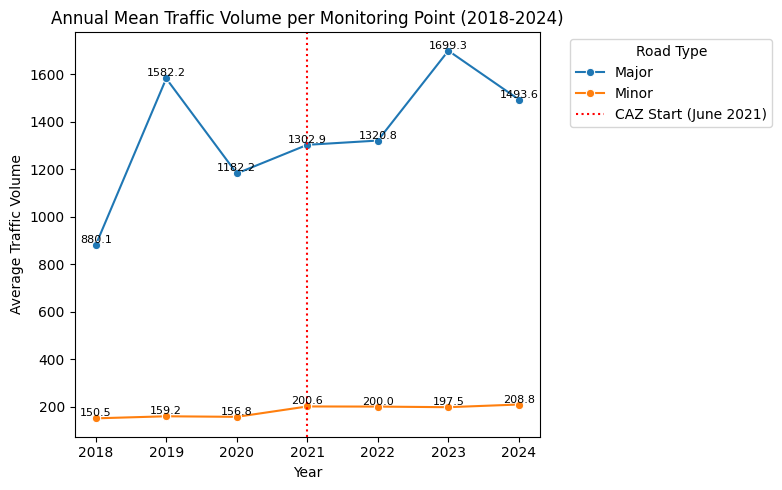

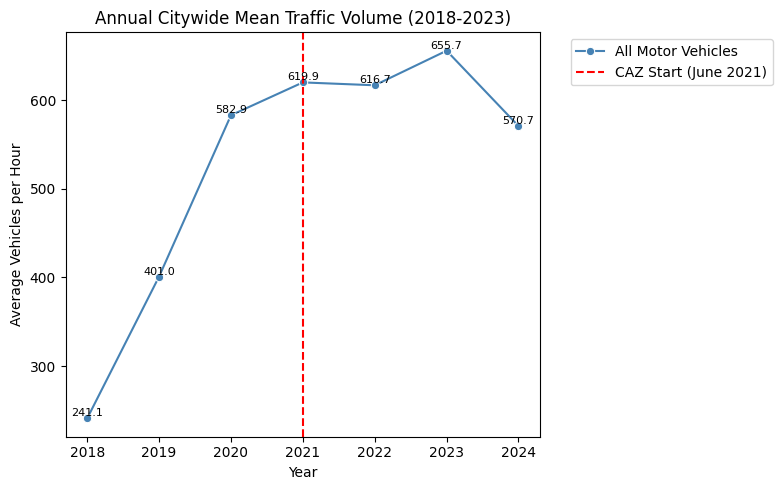

In [97]:
# Line Charts for Traffic Data

annual_traffic =(
    traffic.groupby(['road_type','year'])['all_motor_vehicles']
    .mean()
    .reset_index()
    .sort_values(["year","road_type"])   
)
 
# average across all point(city wide)
citywide_traffic =(
    traffic.groupby('year')['all_motor_vehicles']
    .mean()
    .reset_index()
)

citywide_traffic.to_csv(out_dir/'citywide_traffic.csv', index=False)
annual_traffic.to_csv(out_dir/'annual_traffic.csv', index=False)

plt.figure(figsize=(8,5))
sns.lineplot(data=annual_traffic, x="year", y="all_motor_vehicles", hue="road_type", marker="o")
plt.title("Annual Mean Traffic Volume per Monitoring Point (2018-2024)")
plt.xlabel("Year")
plt.ylabel("Average Traffic Volume")
plt.axvline(x=2021, color="red", linestyle=":", label="CAZ Start (June 2021)")
plt.legend(title="Road Type", bbox_to_anchor=(1.05, 1), loc="upper left")
for point in annual_traffic["road_type"].unique():
     subset = annual_traffic[annual_traffic["road_type"] == point]
     for x,y in zip(subset["year"], subset["all_motor_vehicles"]):
         plt.text(x, y, f"{y:.1f}", fontsize=8, ha='center', va='bottom')
plt.tight_layout()
plt.show()




plt.figure(figsize=(8,5))
sns.lineplot(data=citywide_traffic, x="year", y="all_motor_vehicles", marker="o", color="steelblue", label= "All Motor Vehicles")
plt.title("Annual Citywide Mean Traffic Volume (2018-2023)")
plt.xlabel("Year")
plt.ylabel("Average Vehicles per Hour")
plt.axvline(x=2021, color="red", linestyle="--", label="CAZ Start (June 2021)")
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc="upper left")
for x,y in zip(citywide_traffic["year"], citywide_traffic["all_motor_vehicles"]):
     plt.text(x, y, f"{y:.1f}", fontsize=8, ha='center', va='bottom')
plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

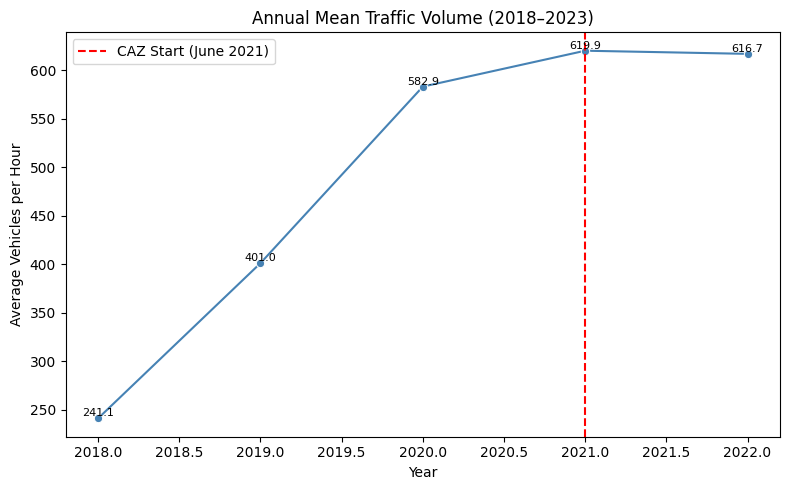

In [87]:

plt.figure(figsize=(8,5))
sns.lineplot(data=citywide_traffic, x="year", y="all_motor_vehicles", marker="o", color="steelblue")
plt.title("Annual Mean Traffic Volume (2018–2023)")
plt.xlabel("Year")
plt.ylabel("Average Vehicles per Hour")
plt.axvline(x=2021, color="red", linestyle="--", label="CAZ Start (June 2021)")
plt.legend()
for x,y in zip(citywide_traffic["year"], citywide_traffic["all_motor_vehicles"]):
     plt.text(x, y, f"{y:.1f}", fontsize=8, ha='center', va='bottom')
plt.tight_layout()
plt.show()